### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [ ]:
df=pd.read_csv('jobs1.csv')

### Exploratory data analysis

In [ ]:
df.head()

,Job Title,Job URL,Company Name,Company URL,Exp,Salary,Location,Skills,Posted
0,Data Engineer: Machine Learning,https://www.naukri.com/job-listings-data-engin...,IBM,https://www.naukri.com/ibm-jobs-careers-16987,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...,1 Day Ago
1,Data Engineer: Machine Learning,https://www.naukri.com/job-listings-data-engin...,IBM,https://www.naukri.com/ibm-jobs-careers-16987,4-6 Yrs,Not disclosed,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...,4 Days Ago
2,Manager - Machine Learning Engineer ( Data Sci...,https://www.naukri.com/job-listings-manager-ma...,Pylon Management Consulting Pvt Ltd,https://www.naukri.com/pylon-management-consul...,7-9 Yrs,Not disclosed,Remote,Data Science|Machine Learning|Deep Learning|IT...,1 Day Ago
3,Data Scientist-Python Machine Learning,https://www.naukri.com/job-listings-data-scien...,Jubna,https://www.naukri.com/premium-service-jobs-ca...,3-5 Yrs,Not disclosed,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...,1 Day Ago
4,Senior/Lead Data Scientist - Machine Learning/...,https://www.naukri.com/job-listings-senior-lea...,Squareroot Consulting Pvt Ltd.,https://www.naukri.com/squareroot-consulting-j...,1-6 Yrs,Not disclosed,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...,NaN


In [ ]:
# Checking for null values
df.isnull().sum()

Job Title         0
Job URL           0
Company Name      0
Company URL       0
Exp               0
Salary            0
Location          0
Skills            0
Posted          368
dtype: int64

In [ ]:
# Checking columns of our dataset
df.columns

Index(['Job Title', 'Job URL', 'Company Name', 'Company URL', 'Exp', 'Salary',
       'Location', 'Skills', 'Posted'],
      dtype='object')

In [ ]:
df.shape

(994, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     994 non-null    object
 1   Job URL       994 non-null    object
 2   Company Name  994 non-null    object
 3   Company URL   994 non-null    object
 4   Exp           994 non-null    object
 5   Salary        994 non-null    object
 6   Location      994 non-null    object
 7   Skills        994 non-null    object
 8   Posted        626 non-null    object
dtypes: object(9)
memory usage: 70.0+ KB


### Feature engineering

In [ ]:
# Dropping irrelevant features
df.drop(['Job URL','Salary','Posted','Company URL'],axis=1,inplace=True)

In [ ]:
df.head()

,Job Title,Company Name,Exp,Location,Skills
0,Data Engineer: Machine Learning,IBM,4-8 Yrs,Bangalore/Bengaluru,deep learning|Interpersonal skills|Time manage...
1,Data Engineer: Machine Learning,IBM,4-6 Yrs,Bengaluru/Bangalore,deep learning|Interpersonal skills|Time manage...
2,Manager - Machine Learning Engineer ( Data Sci...,Pylon Management Consulting Pvt Ltd,7-9 Yrs,Remote,Data Science|Machine Learning|Deep Learning|IT...
3,Data Scientist-Python Machine Learning,Jubna,3-5 Yrs,"Noida, NCR",mapping|ML algorithms|analyses data|machine le...
4,Senior/Lead Data Scientist - Machine Learning/...,Squareroot Consulting Pvt Ltd.,1-6 Yrs,Bangalore/Bengaluru,Visualization|Exploratory Testing|Machine Lear...


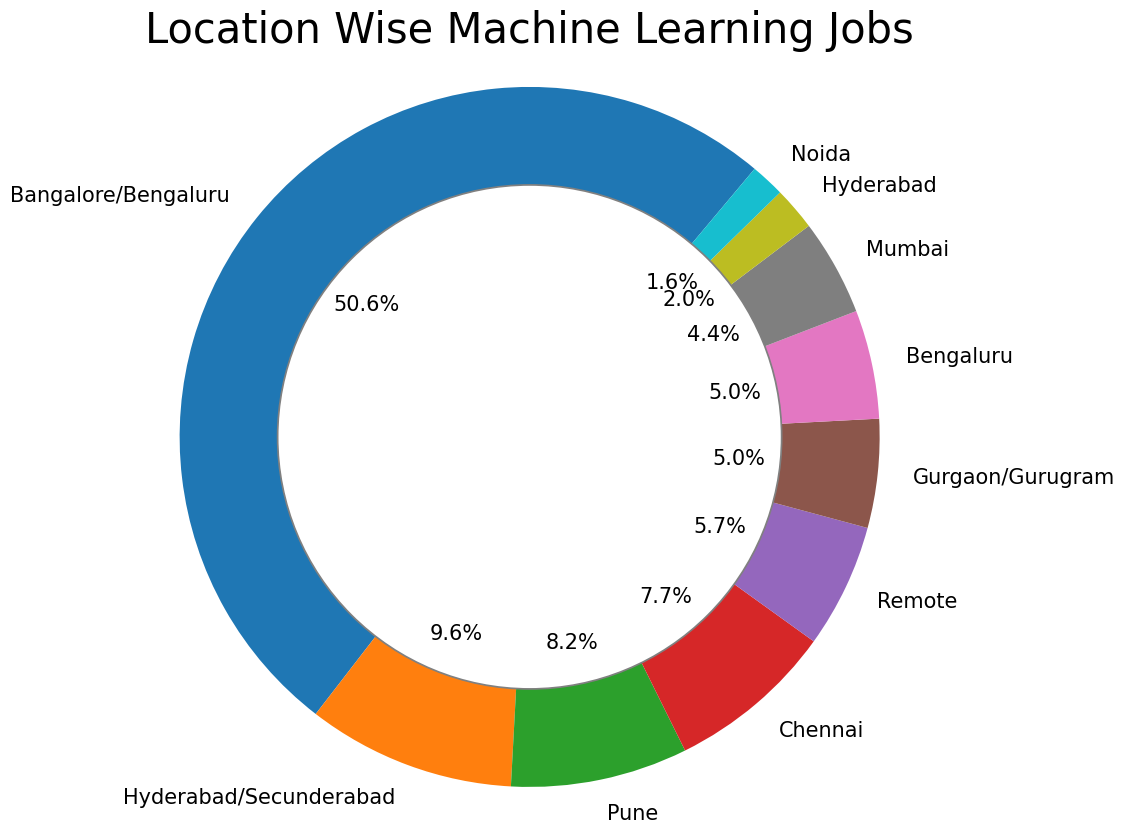

In [ ]:
df.Location.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Machine Learning Jobs",fontsize=30)

circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
plt.show()

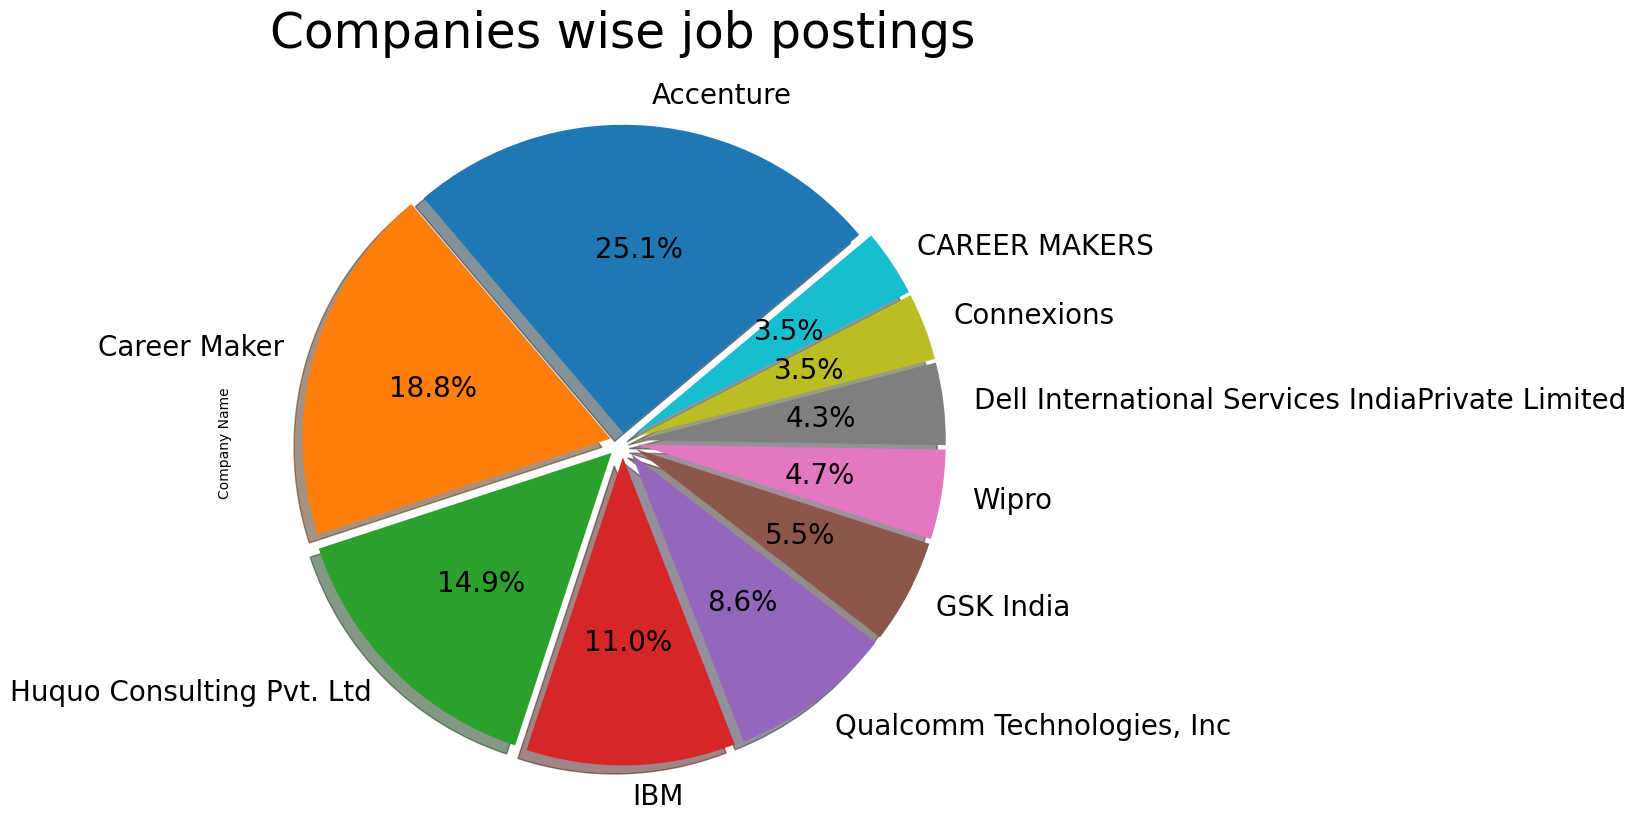

In [ ]:
# Company wise distribution of jobs
df["Company Name"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies wise job postings",fontsize=35)
plt.show()

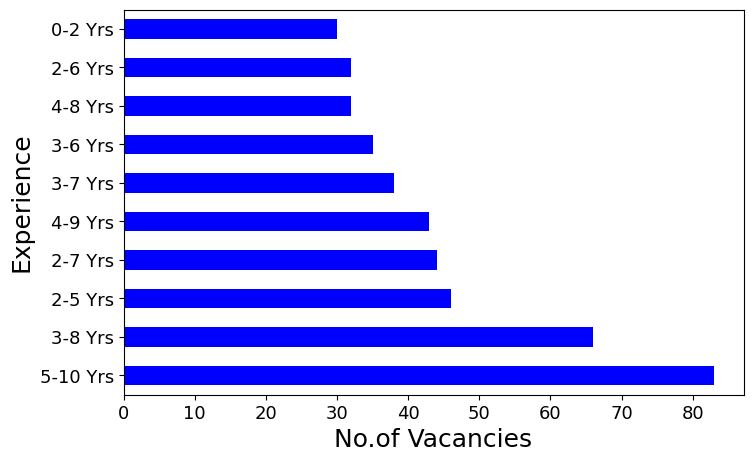

In [ ]:
#Experience wise distribution of jobs
df["Exp"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

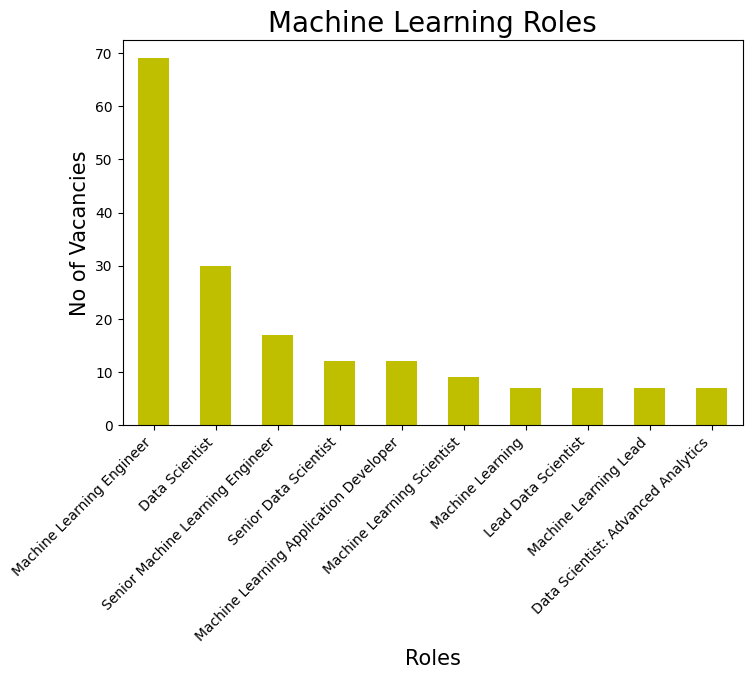

In [ ]:
# Job wise distribution
df["Job Title"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")
plt.xticks(rotation=45,ha='right')
plt.title("Machine Learning Roles",fontsize=20)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

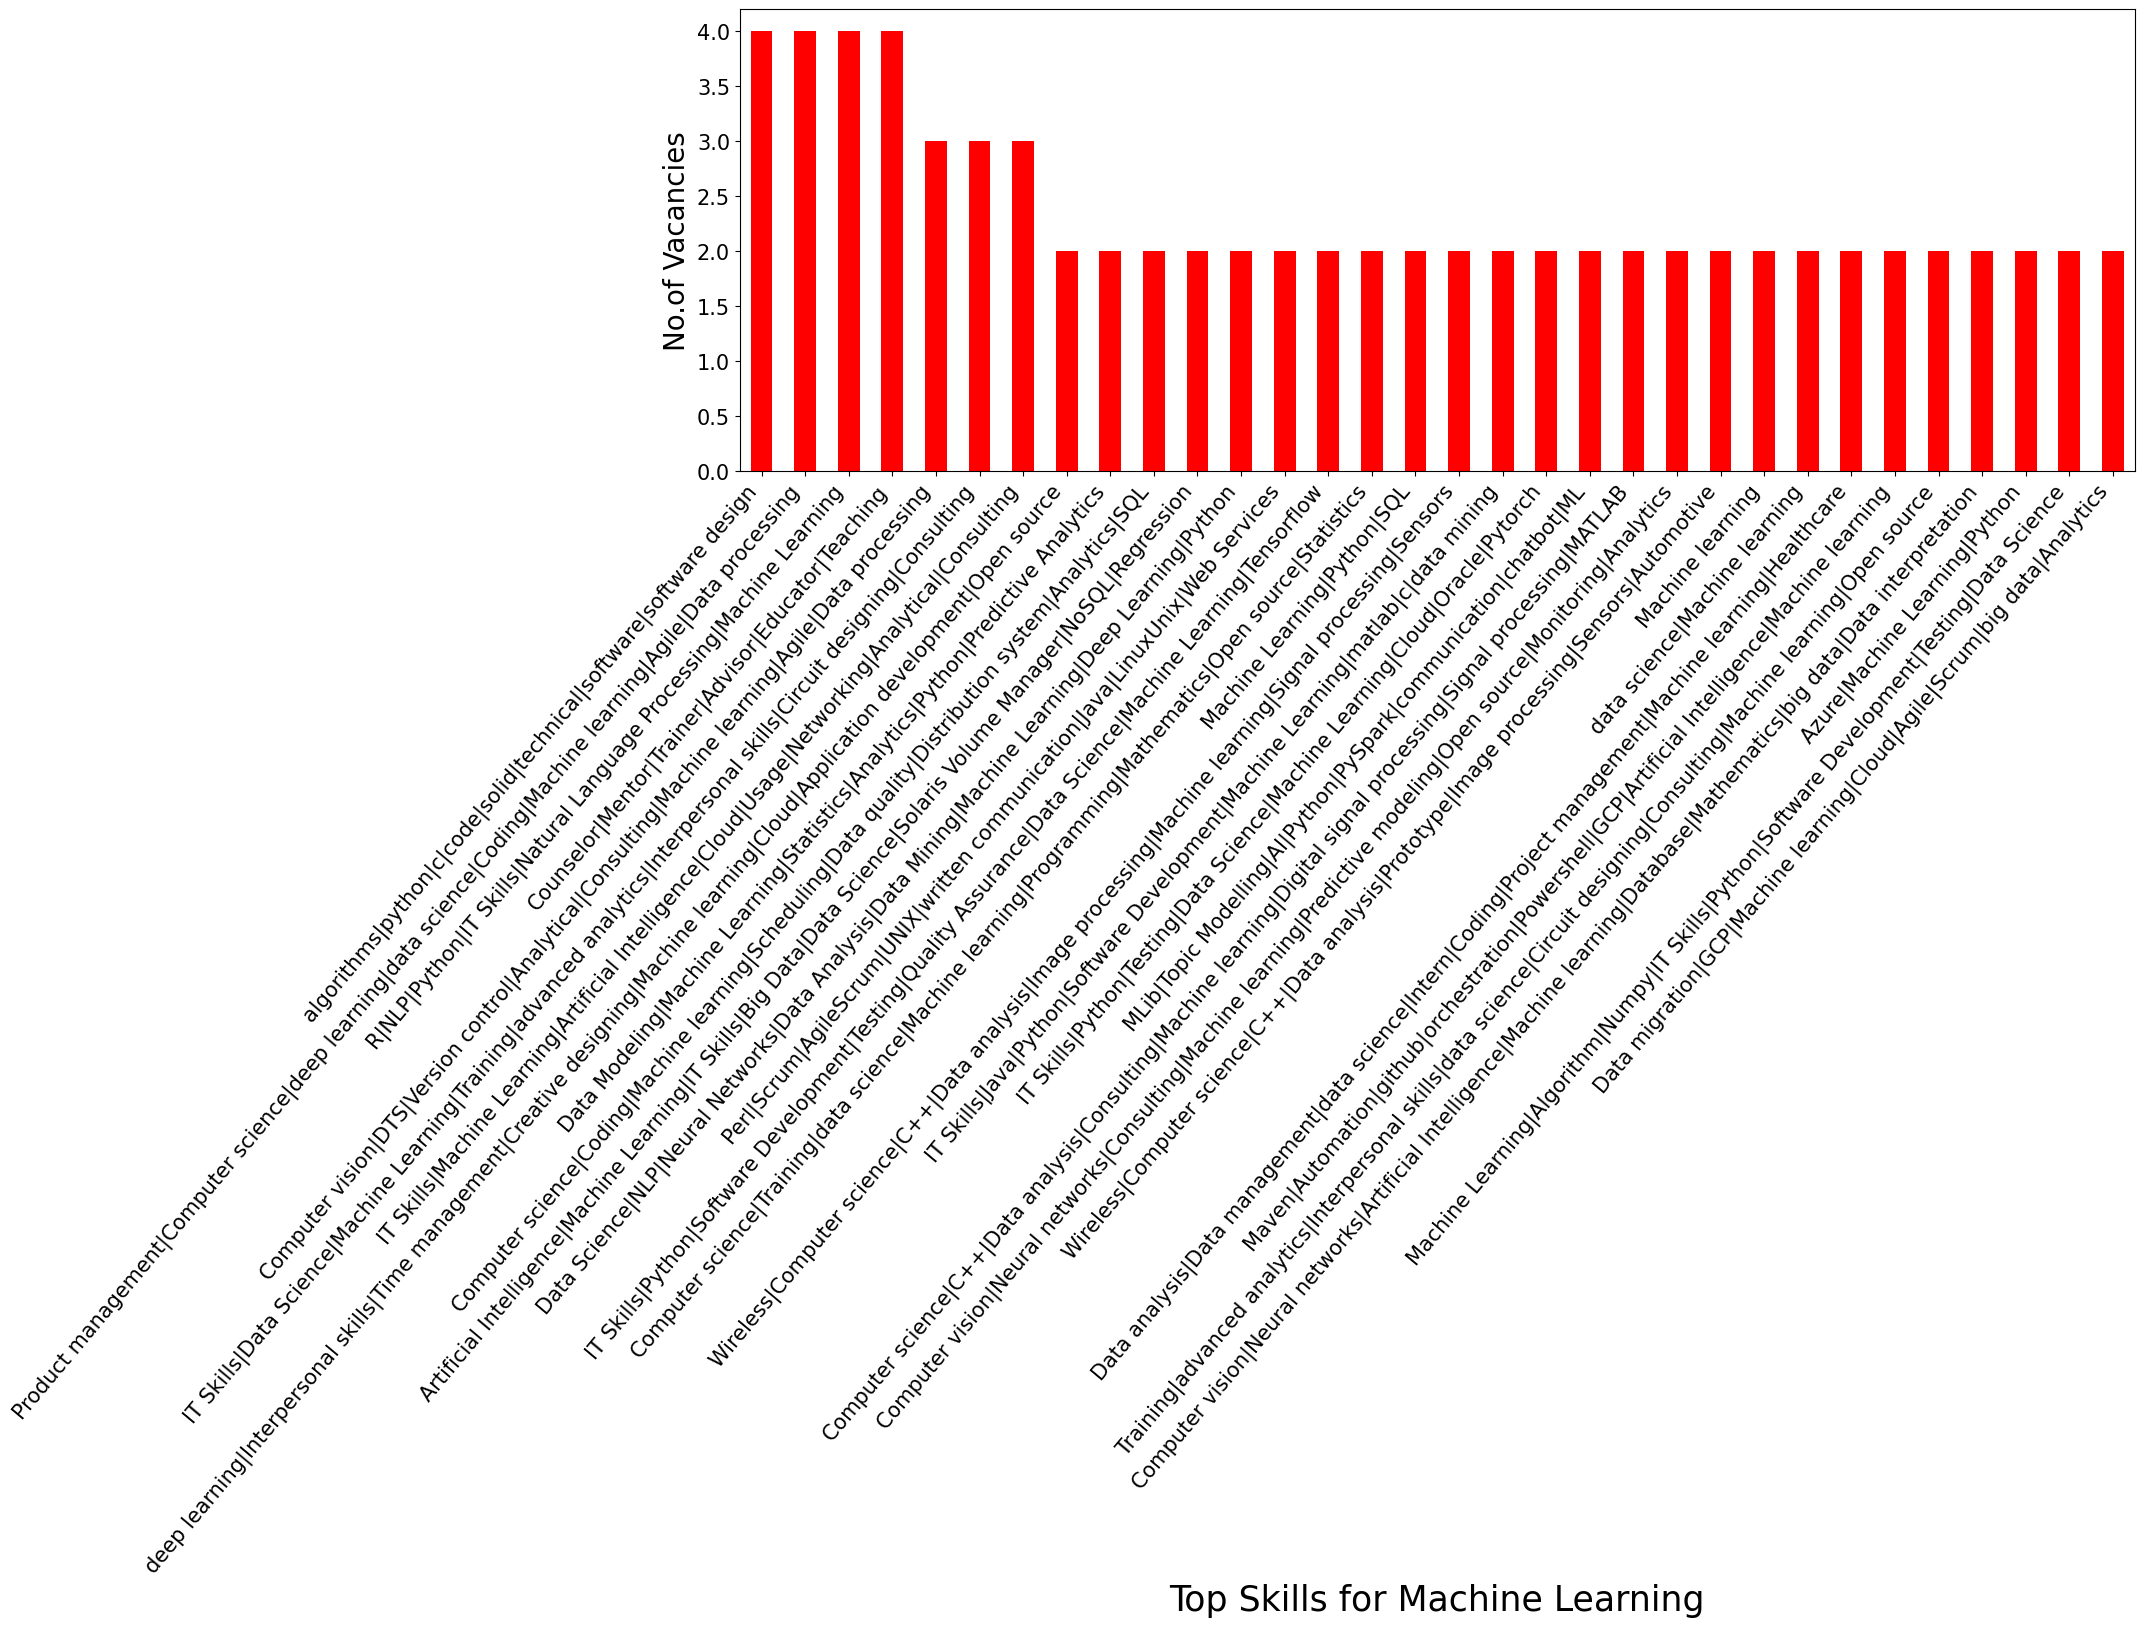

In [ ]:
# Skills wise distribution
df.Skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Machine Learning",fontsize=25)
plt.show()

In [ ]:
# Feature scaling
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Job Title']=le.fit_transform(df['Job Title'])
df['Company Name']=le.fit_transform(df['Company Name'])
df['Exp']=le.fit_transform(df['Exp'])
df['Location']=le.fit_transform(df['Location'])
df['Skills']=le.fit_transform(df['Skills'])


In [ ]:
df.head()

,Job Title,Company Name,Exp,Location,Skills
0,126,214,48,6,902
1,126,214,46,17,902
2,452,351,67,145,262
3,204,248,40,128,922
4,604,417,11,6,854


In [ ]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd
import time

df = pd.read_csv('jobs1.csv')

# Creating a map centered around a location
job_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Geocoding locations to get latitude and longitude using the 'Location' column
geolocator = Nominatim(user_agent="job_map")

for index, row in df.iterrows():
    location = row['Location']
    try:
        geocoded = geolocator.geocode(location, timeout=10)
        if geocoded:
            folium.Marker(
                location=[geocoded.latitude, geocoded.longitude],
                popup=f"{row['Job Title']} at {row['Company Name']}"
            ).add_to(job_map)
    except:
        pass

    time.sleep(1)  # Introduce a delay of 1 second between geocoding requests

job_map
